This jupyter notebook is for testing painting GREAT array profiles onto the sky

In [1]:
#Import library
import sens_map_lib
import numpy as np
from astropy.modeling import models
from matplotlib import pyplot

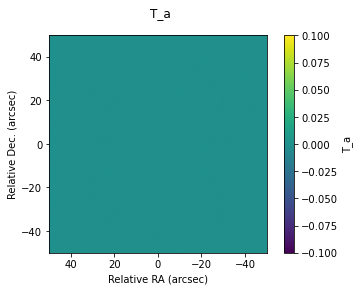

In [2]:
#Generate sky object
sky_grid = sens_map_lib.sky([-50,50], [-50,50], 0.2)

#Plot empty sky grid
sky_grid.plot('data')

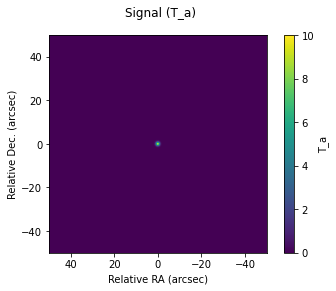

In [3]:
#Create a point source to model the "true" signal on the sky
#This source will be a 2D gaussian gererated from an astropy.modeling object

#Set parameters for 2D gaussian
x = 0.
y = 0.
amplitude = 10.0
fwhm = 1.0
stddev = fwhm / (2.0 * np.sqrt(np.log(2.0)))#Convert FWHM to stddev

#Create 2D gaussian object and import it into the "the" signal omn the sky
point_source_gaussian = models.Gaussian2D(amplitude=amplitude, x_mean=x, y_mean=y, x_stddev=stddev, y_stddev=stddev)
sky_grid.input(point_source_gaussian)

#Plot the "true" signal on the sky
sky_grid.plot('signal')

In [4]:
#Generate an LFA array object
lfa_array = sens_map_lib.LFAV_array()

/Users/kkaplan1/Desktop/the_greatest_sensitivity_mapper/sens_map_lib.py:259: RuntimeWarning: divide by zero encountered in true_divide
  self.noise = 2.0 * Tsys / (self.exptime * deltafreq)**0.5 #Calulate RMS temperature using Equation 6-5 in the observer's handbook


1106.3289503449264 2779.41505262022
S/N before convolution:  0.3980438075637404
1106.6395271510667 2560.3545839591084
S/N after convolution:  0.43222119861220787


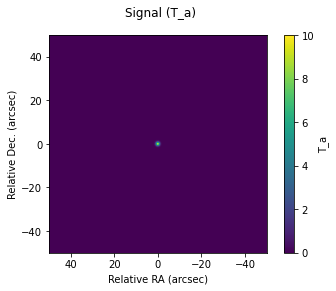

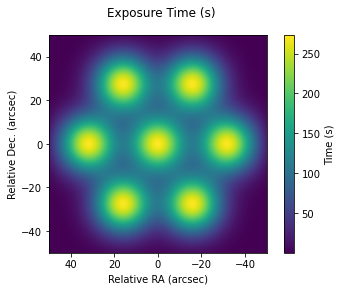

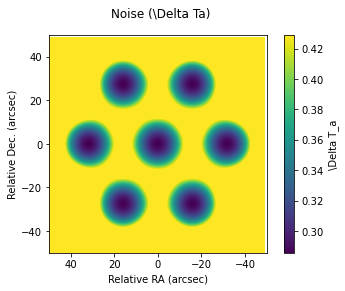

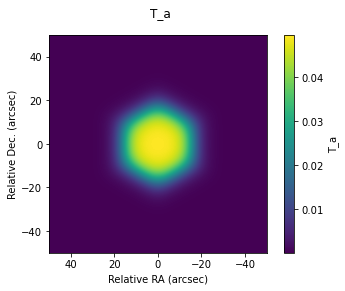

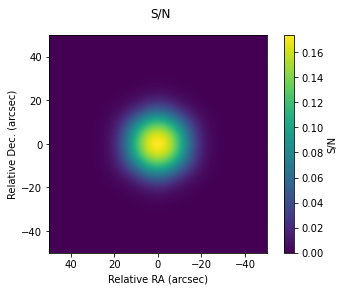

In [5]:
#Simulate a single point observation for the point source

#Clear sky object
sky_grid.clear()

#Test a single pointing being painted onto the sky
lfa_array.single_point(sky_grid, x=0., y=0., array_angle=0.0, time=60.0, cycles=5.0, Tsys=2480.0)

#simulate observagtion
sky_grid.simulate_observation(Tsys=2480.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

579.4232453121092 109.59407641175886
S/N before convolution:  5.28699419059058
583.1207935841788 105.09928494161758
S/N after convolution:  5.548285070712908


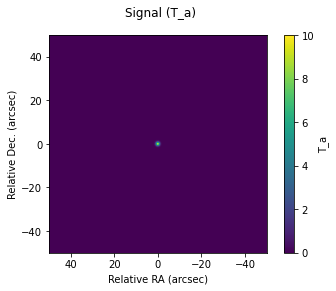

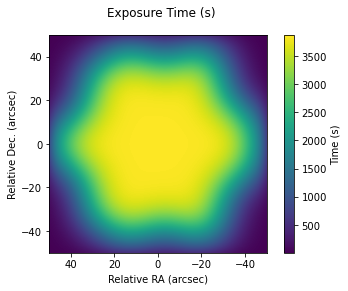

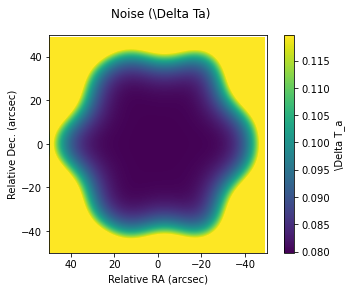

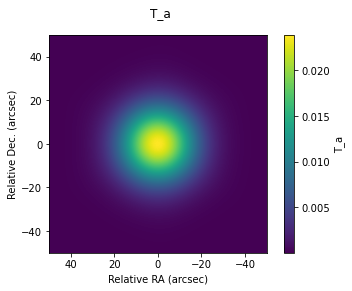

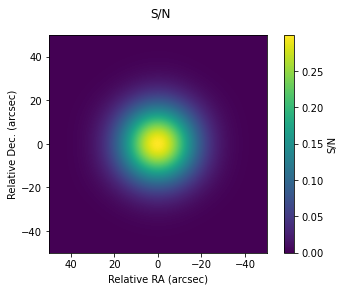

In [6]:
#Simulate a honeycomb map observation for the point source

#Clear sky object
sky_grid.clear()

#Test a single pointing being painted onto the sky
lfa_array.honeycomb(sky_grid, x=0., y=0., array_angle=0.0, time=30.0, cycles=10.0, Tsys=2480.0)

#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

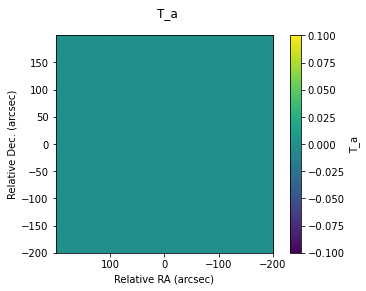

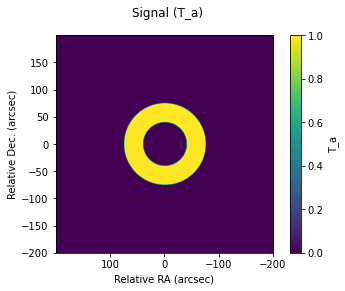

In [7]:
#Now we will test using a ring as our "science target"


#Generate sky object
sky_grid = sens_map_lib.sky([-200,200], [-200,200], 0.2)

#Plot empty sky grid
pyplot.figure()
sky_grid.plot()

#Create "ring" and input into sky_grid
ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=40.0, r_out=75.0)
sky_grid.input(ring)

#Plot the ring
pyplot.figure()
sky_grid.plot('signal')

317484.1392065879 31243229.186096136
S/N before convolution:  0.010161694148691735


/Users/kkaplan1/Desktop/the_greatest_sensitivity_mapper/sens_map_lib.py:274: RuntimeWarning: invalid value encountered in true_divide
  self.data = self.data / self.exptime #normalize by exposure time


317702.8487487804 24564176.323234346
S/N after convolution:  0.012933584442979144
317702.8487487804 24564176.323234346
S/N =  0.012933584442979144


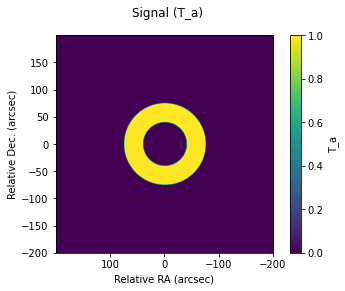

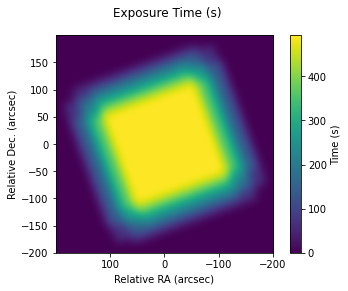

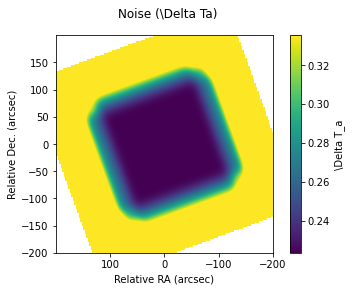

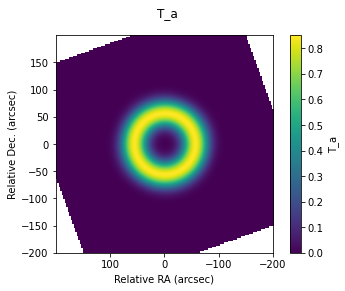

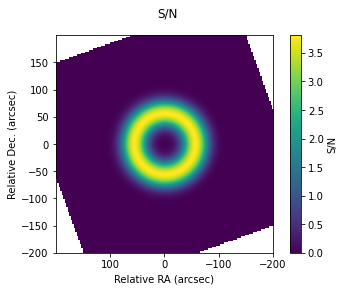

In [8]:
#Test raster mapping the ring and plotting the result

#Clear sky
sky_grid.clear()

#Test a raster map on the sky
lfa_array.map(sky_grid, x=0.0, y=0.0, array_angle=0.0, map_angle=20.0, nx=30, ny=30,
                    dx=8.0, dy=8.0, time=10.0, cycles=1, Tsys=2480.0)


#Simulate the observations
sky_grid.simulate_observation(Tsys=2480.0)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

19856.428046798763 1277290.4023945488
S/N =  0.015545742776719941


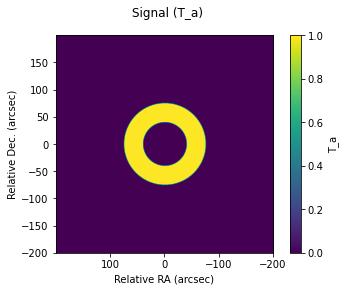

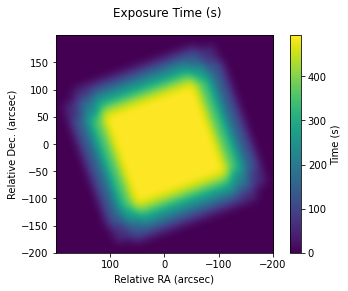

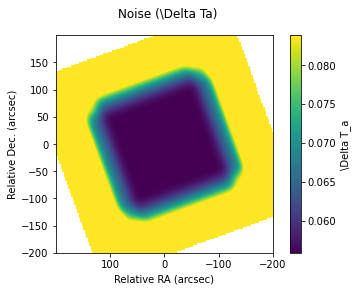

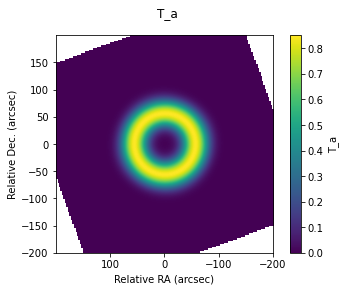

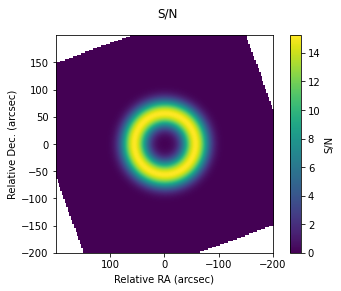

In [9]:
#Test downsampling by a factor of 4
sky_grid.downsample(4)

#Print S/N
print('S/N = ', sky_grid.s2n())

#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

201123.68261497613 44223.08570095618
S/N before convolution:  4.547934171193022
201518.58868821093 38433.936504219935
S/N after convolution:  5.243246126143878


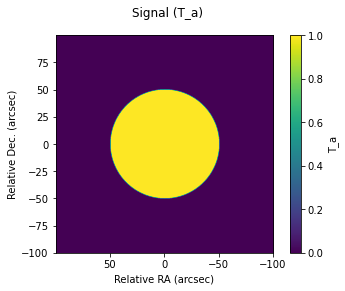

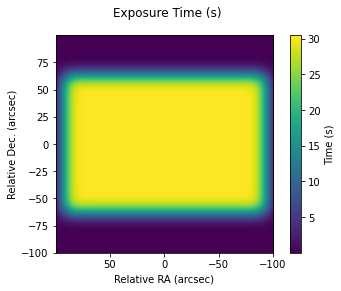

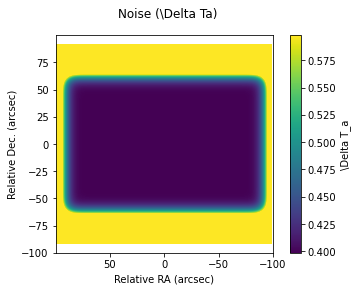

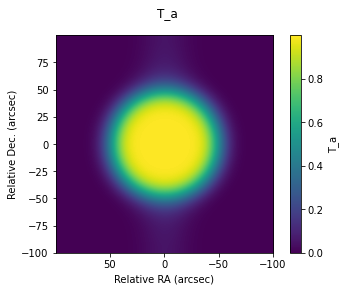

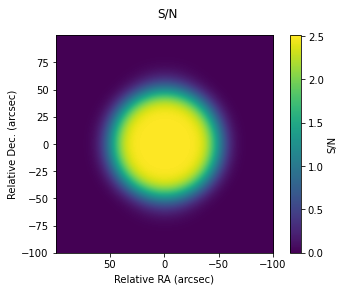

In [10]:
#Test reading in a .aor file and using it to map the ring

sky_grid = sens_map_lib.sky([-100,100], [-100,100], 0.2) #Generate sky object
ring = models.Ring2D(amplitude=1.0, x_0=0., y_0=0., r_in=0.0, r_out=50.0)
sky_grid.input(ring) #Add in artifical ring signal
aors = sens_map_lib.open_aors('test2.aor') #Read in .aor file the result is a list of aor objects
#for aor in aors: #Paint all aors in .aor file onto the exposure map for the sky_grid object, here we assume the LFAH array is used
#    aor.paint(sky_grid, 'LFAH') 
aors[2].paint(sky_grid, '4G4') 
sky_grid.simulate_observation(Tsys=1100.0)#Simulate the observations


#Show results
pyplot.figure()
sky_grid.plot('signal')
pyplot.figure()
sky_grid.plot('exposure')
pyplot.figure()
sky_grid.plot('noise')
pyplot.figure()
sky_grid.plot('data')
pyplot.figure()
sky_grid.plot('s2n')

In [11]:
# #Clear sky grid
# sky_grid.clear()

# #Test something like an OTF map on the sky
# lfa_array.map(sky_grid, x=50.0, y=50.0, array_angle=0.0, map_angle=30.0, nx=21, ny=21,
#                     dx=6.0, dy=6.0, time=1.0, cycles=5)

# #Show result
# sky_grid.plot()

In [12]:
# #Clear sky grid
# sky_grid.clear()

# #Test honeycomb map on the sky
# lfa_array.honeycomb(sky_grid, x=50.0, y=50.0, array_angle=0.0, map_angle=0.0, time=1.0, cycles=5)

# #Show result
# sky_grid.plot()

In [13]:
# #Read in .aor file and show what's inside, the result is a list of aor objects
# aors = sens_map_lib.open_aors('test.aor')

# #Set up a new sky grid for this
# sky_grid = sens_map_lib.sky([-100.0, 150.0], [-100.0, 150.0], 0.2)

In [14]:
# #Paint HFA first aor which is a single pointing
# sky_grid.clear() #Clear sky grid
# aors[0].paint(sky_grid, 'HFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [15]:
# #Paint HFA second aor which is a Raster map
# sky_grid.clear() #Clear sky grid
# aors[1].paint(sky_grid, 'HFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [16]:
# #Paint LFA third aor which is a OTF map
# sky_grid.clear() #Clear sky grid
# aors[2].paint(sky_grid, 'LFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [17]:
# #Paint LFA fourth aor which is a honeycomb map
# sky_grid.clear() #Clear sky grid
# aors[3].paint(sky_grid, 'LFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [18]:
# #Overplot all AORs for the LFA

# sky_grid.clear() #Clear sky grid
# for aor in aors:
#     aor.paint(sky_grid, 'LFA') #Paint onto sky from aor

# #Show result
# sky_grid.plot()

In [19]:
# #Test reading in 4GREAT from an AOR

# sky_grid.clear() #Clear sky grid
# aors = sens_map_lib.open_aors('test2.aor')#Read in AORs

# #Single pointing
# aor = aors[0] #Grab a single pointing
# figure()
# sky_grid.clear()
# suptitle('4G1 Single Pointing')
# aor.paint(sky_grid, '4G1')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G2 Single Pointing')
# aor.paint(sky_grid, '4G2')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G3 Single Pointing')
# aor.paint(sky_grid, '4G3')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G4 Single Pointing')
# aor.paint(sky_grid, '4G4')
# sky_grid.plot()

# #Raster Map
# aor = aors[1] #Grab raster map
# figure()
# sky_grid.clear()
# suptitle('4G1 Raster Map')
# aor.paint(sky_grid, '4G1')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G2 Raster Map')
# aor.paint(sky_grid, '4G2')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G3 Raster Map')
# aor.paint(sky_grid, '4G3')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G4 Raster Map')
# aor.paint(sky_grid, '4G4')
# sky_grid.plot()

# #OTF Map
# aor = aors[2] #Grab OTF map
# figure()
# sky_grid.clear()
# suptitle('4G1 OTF Map')
# aor.paint(sky_grid, '4G1')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G2 OTF Map')
# aor.paint(sky_grid, '4G2')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G3 OTF Map')
# aor.paint(sky_grid, '4G3')
# sky_grid.plot()
# figure()
# sky_grid.clear()
# suptitle('4G4 OTF Map')
# aor.paint(sky_grid, '4G4')
# sky_grid.plot()

In [20]:
#pdb